In [34]:
#!pip install pandas
#!pip install matplotlib
#!pip install -U scikit-learn

  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.0.0-py3-none-any.whl (14 kB)


You should consider upgrading via the 'd:\ai_ml_learning\learning\env\scripts\python.exe -m pip install --upgrade pip' command.


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

In [13]:
data = pd.read_csv('Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [14]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [15]:
# check the shape of the DataFrame (rows, columns)
# there are 200 rows x 4 columns
data.shape

(200, 4)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [18]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


(array([26., 15., 21., 18., 19., 17., 22., 26., 20., 16.]),
 array([  0.7 ,  30.27,  59.84,  89.41, 118.98, 148.55, 178.12, 207.69,
        237.26, 266.83, 296.4 ]),
 <BarContainer object of 10 artists>)

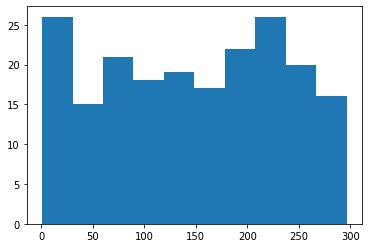

In [24]:
tv = data["TV"]
plt.hist(tv)

(array([30., 20., 21., 17., 18., 23., 14., 21., 21., 15.]),
 array([ 0.  ,  4.96,  9.92, 14.88, 19.84, 24.8 , 29.76, 34.72, 39.68,
        44.64, 49.6 ]),
 <BarContainer object of 10 artists>)

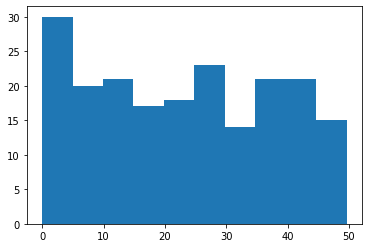

In [26]:
radio = data["Radio"]
plt.hist(radio)

(array([47., 41., 35., 30., 21., 13.,  9.,  2.,  1.,  1.]),
 array([  0.3 ,  11.67,  23.04,  34.41,  45.78,  57.15,  68.52,  79.89,
         91.26, 102.63, 114.  ]),
 <BarContainer object of 10 artists>)

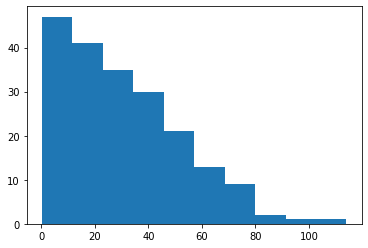

In [27]:
news = data["Newspaper"]
plt.hist(news)

In [28]:
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [29]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [30]:
# select a Series from the DataFrame
y = data['Sales']

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [31]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)


In [44]:
# default split is 80% for training and 20% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [45]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

In [46]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [47]:
y_pred

array([21.73577184, 16.45693776,  7.65993185, 17.89202679, 18.67730671,
       23.86271904, 16.33623628, 13.45649226,  9.177296  , 17.36056228,
       14.4677995 ,  9.85697601, 17.26057027, 16.71866935, 15.09530285,
       15.58923732, 12.45188167, 17.27925151, 11.0944114 , 18.06889853,
        9.33433055, 12.91345761,  8.7842804 , 10.46670654, 11.40303174,
       15.03104665,  9.78479388, 19.46028647, 18.22954934, 17.1958903 ,
       21.60304218, 14.71901407, 16.29205532, 12.36432281, 19.98831261,
       15.37556411, 13.96678297, 10.06809496, 20.97197274,  7.45877832])

In [63]:
np.set_printoptions(precision=2)
lst = y_pred.reshape(len(y_pred))
lst2 = y_test.to_list()

df = pd.DataFrame(list(zip(lst, lst2)),
               columns =['sales', 'predict'])

df

,sales,predict
0,21.735772,23.8
1,16.456938,16.6
2,7.659932,9.5
3,17.892027,14.8
4,18.677307,17.6
5,23.862719,25.5
6,16.336236,16.9
7,13.456492,12.9
8,9.177296,10.5
9,17.360562,17.1


In [64]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8927605914615384

In [67]:
print(linreg.predict([[250.50,35.22,10.88]]))

[20.96]


d:\ai_ml_learning\learning\env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [74]:
# Save the model as a pickle in a file
joblib.dump(linreg, 'Advertising.pkl')

['Advertising.pkl']

In [75]:
# Load the model from the file
linreg_joblib = joblib.load('Advertising.pkl')

In [77]:
# Use the loaded model to make predictions
linreg_joblib.predict(X_test)

array([21.74, 16.46,  7.66, 17.89, 18.68, 23.86, 16.34, 13.46,  9.18,
       17.36, 14.47,  9.86, 17.26, 16.72, 15.1 , 15.59, 12.45, 17.28,
       11.09, 18.07,  9.33, 12.91,  8.78, 10.47, 11.4 , 15.03,  9.78,
       19.46, 18.23, 17.2 , 21.6 , 14.72, 16.29, 12.36, 19.99, 15.38,
       13.97, 10.07, 20.97,  7.46])

In [78]:
print(linreg_joblib.predict([[230.16,25.22,19.88]]))

[18.24]


d:\ai_ml_learning\learning\env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
